In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [7]:
from google.colab import files
uploaded = files.upload()  # This will open a dialog to upload from your local machine


Saving archive (27).zip to archive (27).zip


In [8]:
!unzip archive\ \(27\).zip -d dataset  # or the actual filename


Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/sad/Training_65242339.jpg  
  inflating: dataset/train/sad/Training_65267116.jpg  
  inflating: dataset/train/sad/Training_65275626.jpg  
  inflating: dataset/train/sad/Training_6529266.jpg  
  inflating: dataset/train/sad/Training_65329617.jpg  
  inflating: dataset/train/sad/Training_65338712.jpg  
  inflating: dataset/train/sad/Training_65338797.jpg  
  inflating: dataset/train/sad/Training_65387162.jpg  
  inflating: dataset/train/sad/Training_65404494.jpg  
  inflating: dataset/train/sad/Training_65426218.jpg  
  inflating: dataset/train/sad/Training_65430136.jpg  
  inflating: dataset/train/sad/Training_65437377.jpg  
  inflating: dataset/train/sad/Training_6545735.jpg  
  inflating: dataset/train/sad/Training_65463385.jpg  
  inflating: dataset/train/sad/Training_65473985.jpg  
  inflating: dataset/train/sad/Training_65502829.jpg  
  inflating: dataset/train/sad/Training_65505359.jpg  
  inflating: dat

In [9]:
!ls dataset


test  train


In [15]:
!ls /dataset

ls: cannot access '/dataset': No such file or directory


In [18]:
train_dir = "dataset/train"
test_dir = "dataset/test"

In [17]:
print("Exists dataset/train:", os.path.exists("dataset/train"))
print("Exists /dataset/train:", os.path.exists("/dataset/train"))


Exists dataset/train: True
Exists /dataset/train: False


In [19]:
IMG_HEIGHT, IMG_WIDTH = 48, 48
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 7  # For example: [angry, disgust, fear, happy, neutral, sad, surprise]

In [20]:
# 1) Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [21]:
# 2) Build a simple CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,423 (1.36 MB)

 Trainable params: 356,423 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# 3) Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 134s 146ms/step - accuracy: 0.2220 - loss: 1.8549 - val_accuracy: 0.2632 - val_loss: 1.7709
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 128s 142ms/step - accuracy: 0.2563 - loss: 1.7889 - val_accuracy: 0.3346 - val_loss: 1.6927
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 129s 144ms/step - accuracy: 0.3044 - loss: 1.7366 - val_accuracy: 0.3823 - val_loss: 1.6408
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 130s 144ms/step - accuracy: 0.3271 - loss: 1.6953 - val_accuracy: 0.4007 - val_loss: 1.5662
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 130s 144ms/step - accuracy: 0.3398 - loss: 1.6700 - val_accuracy: 0.4225 - val_loss: 1.5223
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 131s 146ms/step - accuracy: 0.3557 - loss: 1.6362 - val_accuracy: 0.4341 - val_loss: 1.4989
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 140s 144ms/step - accuracy: 0.3697 - loss: 1.6042 - val_accuracy: 0.4398 - val_loss: 1.4651
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 143s 145ms/step - accuracy: 0.3813 -

In [23]:
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print(f"Test Accuracy: {test_acc:.2%}")


Test Accuracy: 47.06%


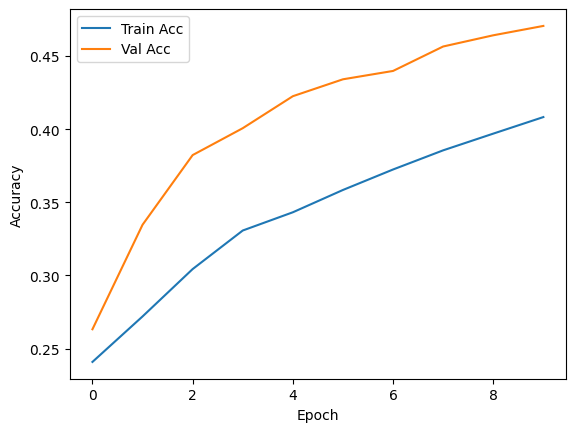

In [24]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

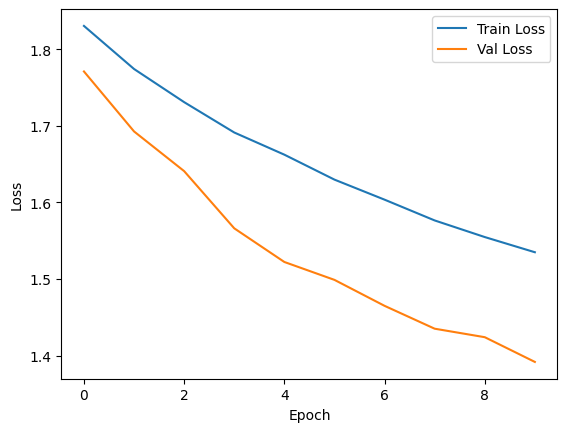

In [25]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
print(train_generator.class_indices)
# Might output something like:
# {
#   'angry': 0,
#   'disgust': 1,
#   'fear': 2,
#   'happy': 3,
#   'neutral': 4,
#   'sad': 5,
#   'surprise': 6
# }


{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [27]:
class_labels = {v: k for k, v in train_generator.class_indices.items()}


In [31]:
# 1) Create the reverse mapping
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# 2) Single image prediction
test_image_path = "Training_3908.jpg"
img = load_img(test_image_path, target_size=(48, 48))
img_array = img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
pred_class_index = np.argmax(predictions[0])
pred_label = class_labels[pred_class_index]

print("Predicted class:", pred_label)
print("All class probabilities:", predictions[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted class: angry
All class probabilities: [0.36093444 0.03994245 0.18036321 0.08152421 0.13420862 0.1388342
 0.06419291]


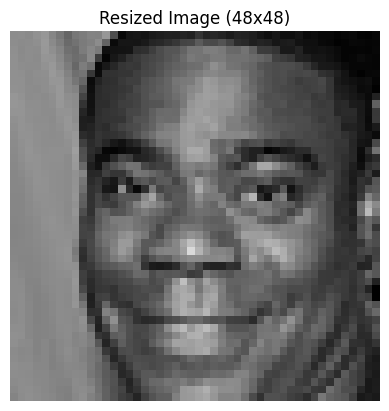

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted class: happy
All class probabilities: [0.0352176  0.0027946  0.0241691  0.88078374 0.0326547  0.01672351
 0.00765682]


In [38]:
# 1) Create the reverse mapping
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# 2) Single image prediction
test_image_path = "PrivateTest_218533.jpg"

plt.imshow(img)
plt.title("Resized Image (48x48)")
plt.axis("off")
plt.show()


img = load_img(test_image_path, target_size=(48, 48))
img_array = img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
pred_class_index = np.argmax(predictions[0])
pred_label = class_labels[pred_class_index]

print("Predicted class:", pred_label)
print("All class probabilities:", predictions[0])


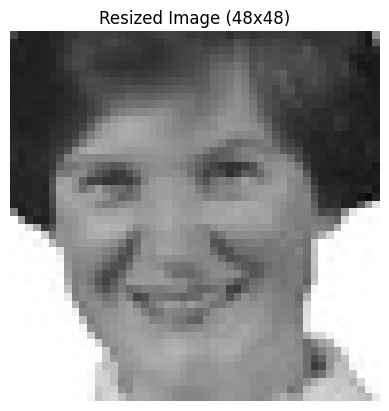

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class: angry
All class probabilities: [0.23832229 0.03918377 0.23118351 0.14936458 0.14703158 0.0719488
 0.12296551]


In [39]:
# 1) Create the reverse mapping
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# 2) Single image prediction
test_image_path = "PrivateTest_251881.jpg"

plt.imshow(img)
plt.title("Resized Image (48x48)")
plt.axis("off")
plt.show()


img = load_img(test_image_path, target_size=(48, 48))
img_array = img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
pred_class_index = np.argmax(predictions[0])
pred_label = class_labels[pred_class_index]

print("Predicted class:", pred_label)
print("All class probabilities:", predictions[0])


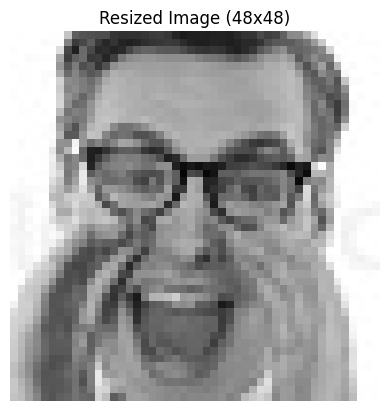

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted class: happy
All class probabilities: [0.0342715  0.00538115 0.05002214 0.6769793  0.1802765  0.03716506
 0.01590436]


In [40]:
# 1) Create the reverse mapping
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# 2) Single image prediction
test_image_path = "PrivateTest_95094.jpg"

plt.imshow(img)
plt.title("Resized Image (48x48)")
plt.axis("off")
plt.show()

img = load_img(test_image_path, target_size=(48, 48))
img_array = img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
pred_class_index = np.argmax(predictions[0])
pred_label = class_labels[pred_class_index]

print("Predicted class:", pred_label)
print("All class probabilities:", predictions[0])


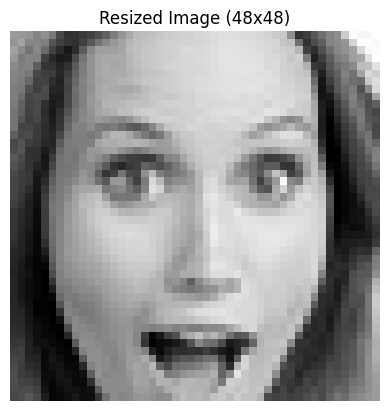

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted class: surprise
All class probabilities: [0.01412307 0.00114472 0.14927278 0.03006488 0.01747392 0.01428767
 0.773633  ]


In [45]:
# 1) Create the reverse mapping
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# 2) Single image prediction
test_image_path = "PrivateTest_2264189.jpg"

plt.imshow(img)
plt.title("Resized Image (48x48)")
plt.axis("off")
plt.show()


img = load_img(test_image_path, target_size=(48, 48))
img_array = img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
pred_class_index = np.argmax(predictions[0])
pred_label = class_labels[pred_class_index]

print("Predicted class:", pred_label)
print("All class probabilities:", predictions[0])


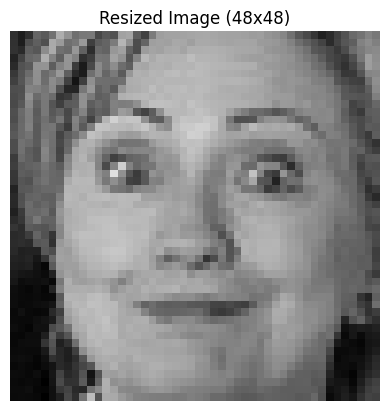

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted class: surprise
All class probabilities: [0.03737619 0.01075831 0.2099381  0.17021869 0.19497293 0.05501955
 0.32171622]


In [47]:
# 1) Create the reverse mapping
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# 2) Single image prediction
test_image_path = "PrivateTest_17479537.jpg"

plt.imshow(img)
plt.title("Resized Image (48x48)")
plt.axis("off")
plt.show()


img = load_img(test_image_path, target_size=(48, 48))
img_array = img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
pred_class_index = np.argmax(predictions[0])
pred_label = class_labels[pred_class_index]

print("Predicted class:", pred_label)
print("All class probabilities:", predictions[0])
